In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# $A^T A$ is a symmetric matrix

In [2]:
A = np.array([[7,3,9],[1,9,4],[5,4,8]])

In [3]:
A.T

array([[7, 1, 5],
       [3, 9, 4],
       [9, 4, 8]])

In [4]:
A.T @ A

array([[ 75,  50, 107],
       [ 50, 106,  95],
       [107,  95, 161]])

#### The resulting matrix is a symmetric matrix

# Least Squares

There are times when $Ax = b$ cannot be solved exactly. This is mostly seen in overdetermined systems where there are more equations than unknowns. What we do is use the following equation:

$$A^TA\hat{x} = A^T b$$

The equation above makes the system solvable. 

In [5]:
def least_squares_line(points):
    m,n = points.shape

    A = np.hstack([np.ones(m).reshape((m,1)), points[:,0].reshape((m,1))])
    b = points[:,1]
    
    w = np.linalg.solve(A.T @ A, A.T @ b)
    return w

In [6]:
points = np.array([[0,6],[1,0],[2,0]])

w = least_squares_line(points)

<IPython.core.display.Javascript object>


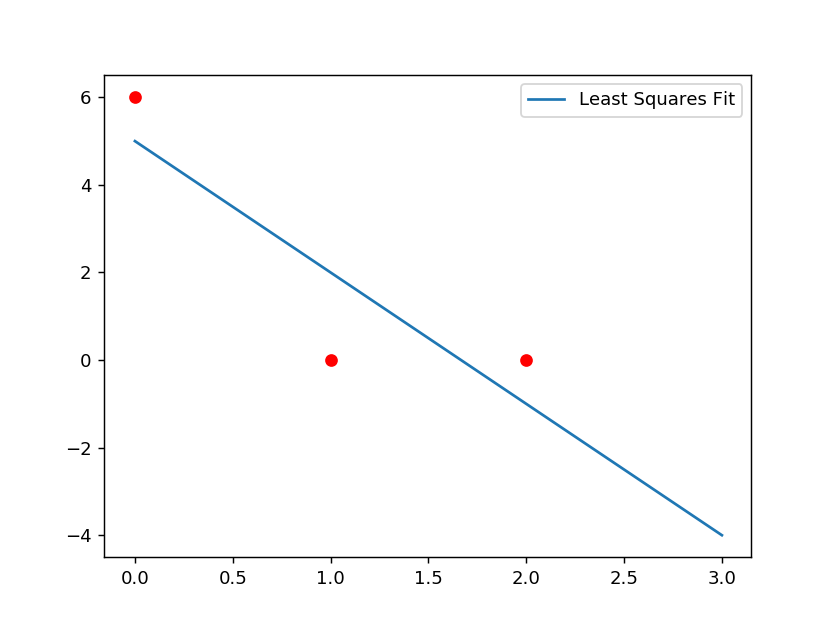

In [7]:
# Creating the plot

xvals = np.linspace(0,3)
y = lambda x: w[0] + w[1]*x


plt.figure()
plt.scatter(points[:,0], points[:,1], c='r')
plt.plot(xvals,y(xvals), label='Least Squares Fit')
plt.legend()

In [8]:
p = y(points[:,0])
p

array([ 5.,  2., -1.])

In [9]:
# Error is original y - estimated y

e = points[:,1] - y(points[:,0]) 
e

array([ 1., -2.,  1.])

### p + e = b

In [10]:
p + e

array([6., 0., 0.])

In [11]:
p@e # This is a floating point error, this is zero

0.0

## $p \cdot e = 0$

This shows that the column space $C(A)$ and left nullspace $N(A^T)$ are orthogonal

# Quadratic Problem for Least Squares



In [42]:
def least_squares_parabolic(points):
    m,n = points.shape
    points = points.astype(float)
    
    A = np.hstack([np.ones(m).reshape((m,1)), points[:,0].reshape((m,1)), points[:,0].reshape((m,1))**2])
    b = points[:,1]
    
    if m==n:
        w = np.linalg.solve(A, b)
        return w
    
    if m>n:
        w = np.linalg.solve(A.T @ A, A.T @ b)
        return w

### When m=n

In [43]:
points = np.array([[0,6],
                   [1,0],
                   [2,0]])

w = least_squares_parabolic(points)

<IPython.core.display.Javascript object>


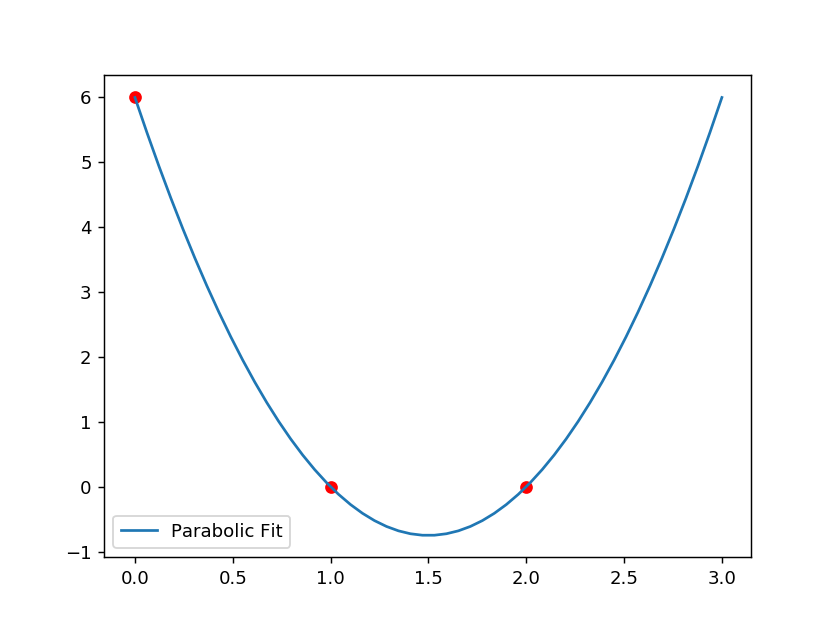

In [44]:
xvals = np.linspace(0,3)
y = lambda z: w[0] + w[1]*(z) + (w[2] * (z**2))

plt.figure()
plt.scatter(points[:,0], points[:,1], c='r')
plt.plot(xvals,y(xvals), label='Parabolic Fit')
plt.legend()

### When m>n

In [35]:
points = np.array([[0,6],
                   [1,0],
                   [2,0],
                   [3,1],
                   [3.5,6]])

w = least_squares_parabolic(points)

<IPython.core.display.Javascript object>


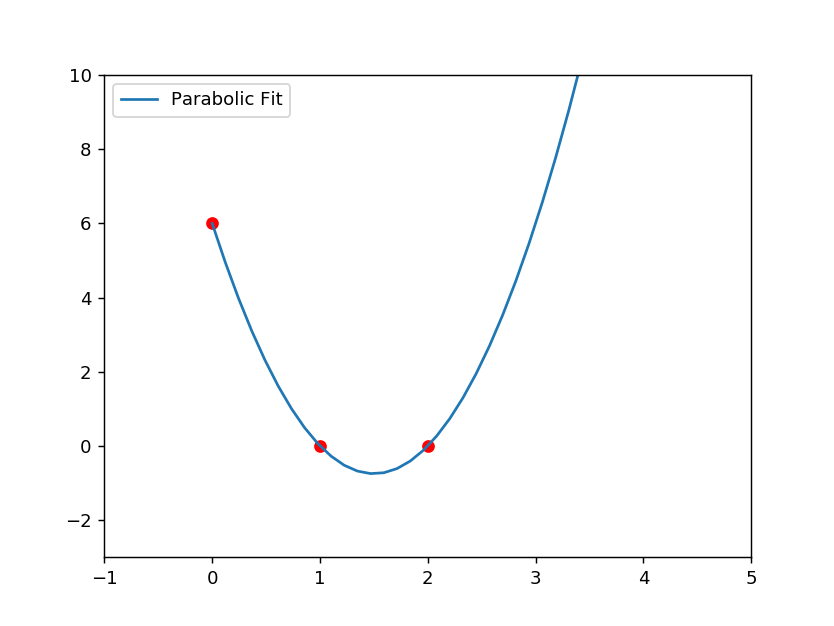

In [45]:
xvals = np.linspace(0,6)
y = lambda z: w[0] + w[1]*(z) + (w[2] * (z**2))

plt.figure()
plt.scatter(points[:,0], points[:,1], c='r')
plt.plot(xvals,y(xvals), label='Parabolic Fit')
plt.ylim(-3,10)
plt.xlim(-1,5)
plt.legend()

# Exponential Problem for Least Squares

In [48]:
points = np.array([[0, 1],
                   [1, 3],
                   [1.5, 5],
                   [0.5,1.5],
                   [0.8, 2]])

In [49]:
m,n = points.shape
points = points.astype(float)

In [50]:
np.hstack([np.ones(m).reshape((m,1)), points[:,0].reshape((m,1)), points[:,0].reshape((m,1))**2])

array([[1.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  ],
       [1.  , 1.5 , 2.25],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64]])

# Gram Schmidt Orthonormalization

In [18]:
def gram_schmidt(A):
    '''
    Pass a square matrix A to convert it into a matrix composed of orthonormal vectors.
    '''

    A = A.astype(float)
    m, n = A.shape
    
    q = []
    for i in range(0,n):
        if i==0:
            q.append(A[:,0])
        else:
            q.append(A[:,i])
            for j in range(0, i):
                q[i] -= ((q[j].T @ A[:,i]) / (q[j].T @ q[j]))*q[j]
                
                
    # Normalizing the orthonormal vectors
    q = [i/np.linalg.norm(i) for i in q]
    
    # Q is the orthonormal matrix we are looking for
    Q = np.vstack(np.array(q).T)
    
    return Q

## Sanity checks

In [19]:
A = np.array([[1,1],
              [1,0],
              [1,2]])

gram_schmidt(A)

array([[ 0.57735027,  0.        ],
       [ 0.57735027, -0.70710678],
       [ 0.57735027,  0.70710678]])

In [20]:
A = np.array([[1,2,3],
              [4,5,13],
              [7,8,2]])

gram_schmidt(A)

array([[ 0.12309149,  0.90453403, -0.40824829],
       [ 0.49236596,  0.30151134,  0.81649658],
       [ 0.86164044, -0.30151134, -0.40824829]])

In [21]:
A = np.array([[1,3],
              [5,1]])

gram_schmidt(A)

array([[ 0.19611614,  0.98058068],
       [ 0.98058068, -0.19611614]])